## **Import important libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import glob
import os
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
import time,datetime
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from graphviz import Digraph
#import joblib
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split, BaseCrossValidator
import sqlite3
import pandas.io.sql as psql
import csv,os,imp
from sklearn.utils import class_weight
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize,Normalizer,StandardScaler,MinMaxScaler,scale 

## **Read the dataset**

In [ ]:
!unzip "/content/drive/My Drive/GP_Network_Failure_Dataset/dataset_a.zip"  -d "/content" 
!unzip "/content/drive/My Drive/GP_Network_Failure_Dataset/dataset_bc.zip"  -d "/content"

Archive:  /content/drive/My Drive/GP_Network_Failure_Dataset/dataset_a.zip
  inflating: /content/dataset_a.csv  
Archive:  /content/drive/My Drive/GP_Network_Failure_Dataset/dataset_bc.zip
  inflating: /content/dataset_bc.csv  


In [ ]:
df1= pd.read_csv('dataset_a.csv')
df2= pd.read_csv('dataset_bc.csv')

df = pd.concat([df1,df2], ignore_index=True)
df.describe()

,labelnew,traintest,datetime,interfaces_interfaces-state_interface_statistics_in-octets,interfaces_interfaces-state_interface_statistics_in-unicast-pkts,interfaces_interfaces-state_interface_statistics_in-broadcast-pkts,interfaces_interfaces-state_interface_statistics_in-multicast-pkts,interfaces_interfaces-state_interface_statistics_in-discards,interfaces_interfaces-state_interface_statistics_in-multicast-pkts.1,interfaces_interfaces-state_interface_statistics_in-errors,...,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_name.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_user.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_nice.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_irq.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait.1
count,849994.000000,849994.000000,8.499390e+05,8.493380e+05,849338.000000,849338.0,849338.0,849338.0,849338.0,849338.0,...,849315.000000,849315.000000,849315.0,849315.000000,849315.000000,849315.000000,849315.000000,849315.0,849315.000000,849316.000000
mean,0.011609,0.260844,2.021019e+13,2.216037e+05,1249.931052,0.0,0.0,0.0,0.0,0.0,...,0.006495,0.195872,1.0,1.883423,1.286435,0.005805,96.576337,0.0,0.063896,0.183394
std,0.107120,0.439095,3.143926e+07,1.039822e+06,5861.993540,0.0,0.0,0.0,0.0,0.0,...,0.026865,0.869138,0.0,2.846648,5.402764,0.396449,7.999713,0.0,0.121413,0.878734
min,0.000000,0.000000,2.021013e+13,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,2.021020e+13,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.0,0.800000,0.200000,0.000000,97.060000,0.0,0.000000,0.000000
50%,0.000000,0.000000,2.021021e+13,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.200000,1.0,1.100000,0.400000,0.000000,98.390000,0.0,0.000000,0.100000
75%,0.000000,1.000000,2.021021e+13,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.300000,1.0,1.800000,0.900000,0.000000,98.800000,0.0,0.100000,0.300000
max,1.000000,1.000000,2.021022e+13,5.383605e+06,29823.000000,0.0,0.0,0.0,0.0,0.0,...,0.550000,97.700000,1.0,91.070000,77.770000,58.720000,100.000000,0.0,2.040000,97.820000


In [ ]:
df.describe()

,labelnew,traintest,datetime,interfaces_interfaces-state_interface_statistics_in-octets,interfaces_interfaces-state_interface_statistics_in-unicast-pkts,interfaces_interfaces-state_interface_statistics_in-broadcast-pkts,interfaces_interfaces-state_interface_statistics_in-multicast-pkts,interfaces_interfaces-state_interface_statistics_in-discards,interfaces_interfaces-state_interface_statistics_in-multicast-pkts.1,interfaces_interfaces-state_interface_statistics_in-errors,...,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_name.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_user.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_nice.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_irq.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait.1
count,849994.000000,849994.000000,8.499390e+05,8.493380e+05,849338.000000,849338.0,849338.0,849338.0,849338.0,849338.0,...,849315.000000,849315.000000,849315.0,849315.000000,849315.000000,849315.000000,849315.000000,849315.0,849315.000000,849316.000000
mean,0.011609,0.260844,2.021019e+13,2.216037e+05,1249.931052,0.0,0.0,0.0,0.0,0.0,...,0.006495,0.195872,1.0,1.883423,1.286435,0.005805,96.576337,0.0,0.063896,0.183394
std,0.107120,0.439095,3.143926e+07,1.039822e+06,5861.993540,0.0,0.0,0.0,0.0,0.0,...,0.026865,0.869138,0.0,2.846648,5.402764,0.396449,7.999713,0.0,0.121413,0.878734
min,0.000000,0.000000,2.021013e+13,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,2.021020e+13,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.0,0.800000,0.200000,0.000000,97.060000,0.0,0.000000,0.000000
50%,0.000000,0.000000,2.021021e+13,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.200000,1.0,1.100000,0.400000,0.000000,98.390000,0.0,0.000000,0.100000
75%,0.000000,1.000000,2.021021e+13,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.300000,1.0,1.800000,0.900000,0.000000,98.800000,0.0,0.100000,0.300000
max,1.000000,1.000000,2.021022e+13,5.383605e+06,29823.000000,0.0,0.0,0.0,0.0,0.0,...,0.550000,97.700000,1.0,91.070000,77.770000,58.720000,100.000000,0.0,2.040000,97.820000


## **Get some information about the dataset**

In [ ]:
df['labelnew'].value_counts()

0    840126
1      9868
Name: labelnew, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
labelnew,849994.0,1.160949e-02,1.071202e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
traintest,849994.0,2.608442e-01,4.390954e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
datetime,849939.0,2.021019e+13,3.143926e+07,2.021013e+13,2.021020e+13,2.021021e+13,2.021021e+13,2.021022e+13
interfaces_interfaces-state_interface_statistics_in-octets,849338.0,2.216037e+05,1.039822e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.383605e+06
interfaces_interfaces-state_interface_statistics_in-unicast-pkts,849338.0,1.249931e+03,5.861994e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.982300e+04
...,...,...,...,...,...,...,...,...
software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_nice.1,849315.0,5.805102e-03,3.964487e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.872000e+01
software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle.1,849315.0,9.657634e+01,7.999713e+00,0.000000e+00,9.706000e+01,9.839000e+01,9.880000e+01,1.000000e+02
software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_irq.1,849315.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq.1,849315.0,6.389586e-02,1.214135e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,2.040000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849994 entries, 0 to 849993
Columns: 108 entries, labelnew to software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait.1
dtypes: float64(104), int64(2), object(2)
memory usage: 700.4+ MB


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]), <a list of 106 Text major ticklabel objects>)

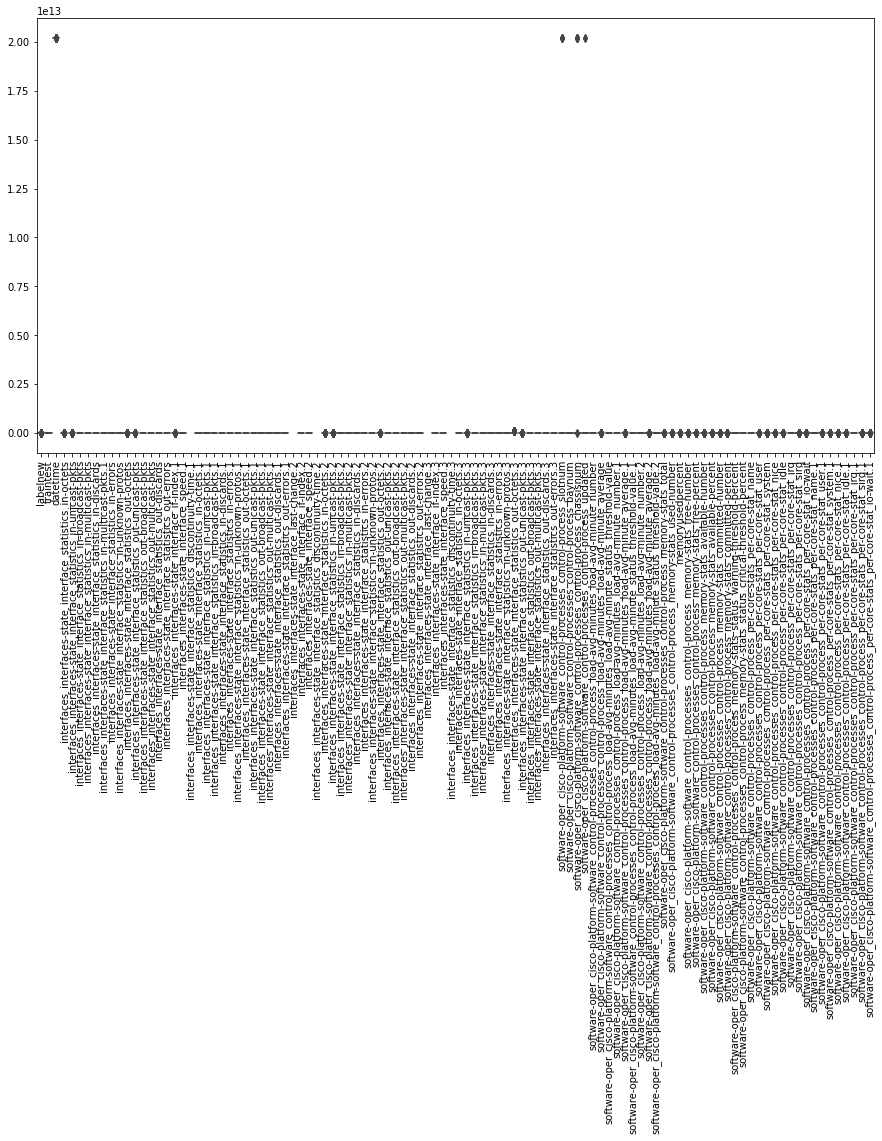

In [ ]:
plt.figure(figsize =[15,8])
sns.boxplot(data=df)
plt.xticks(rotation = 90)

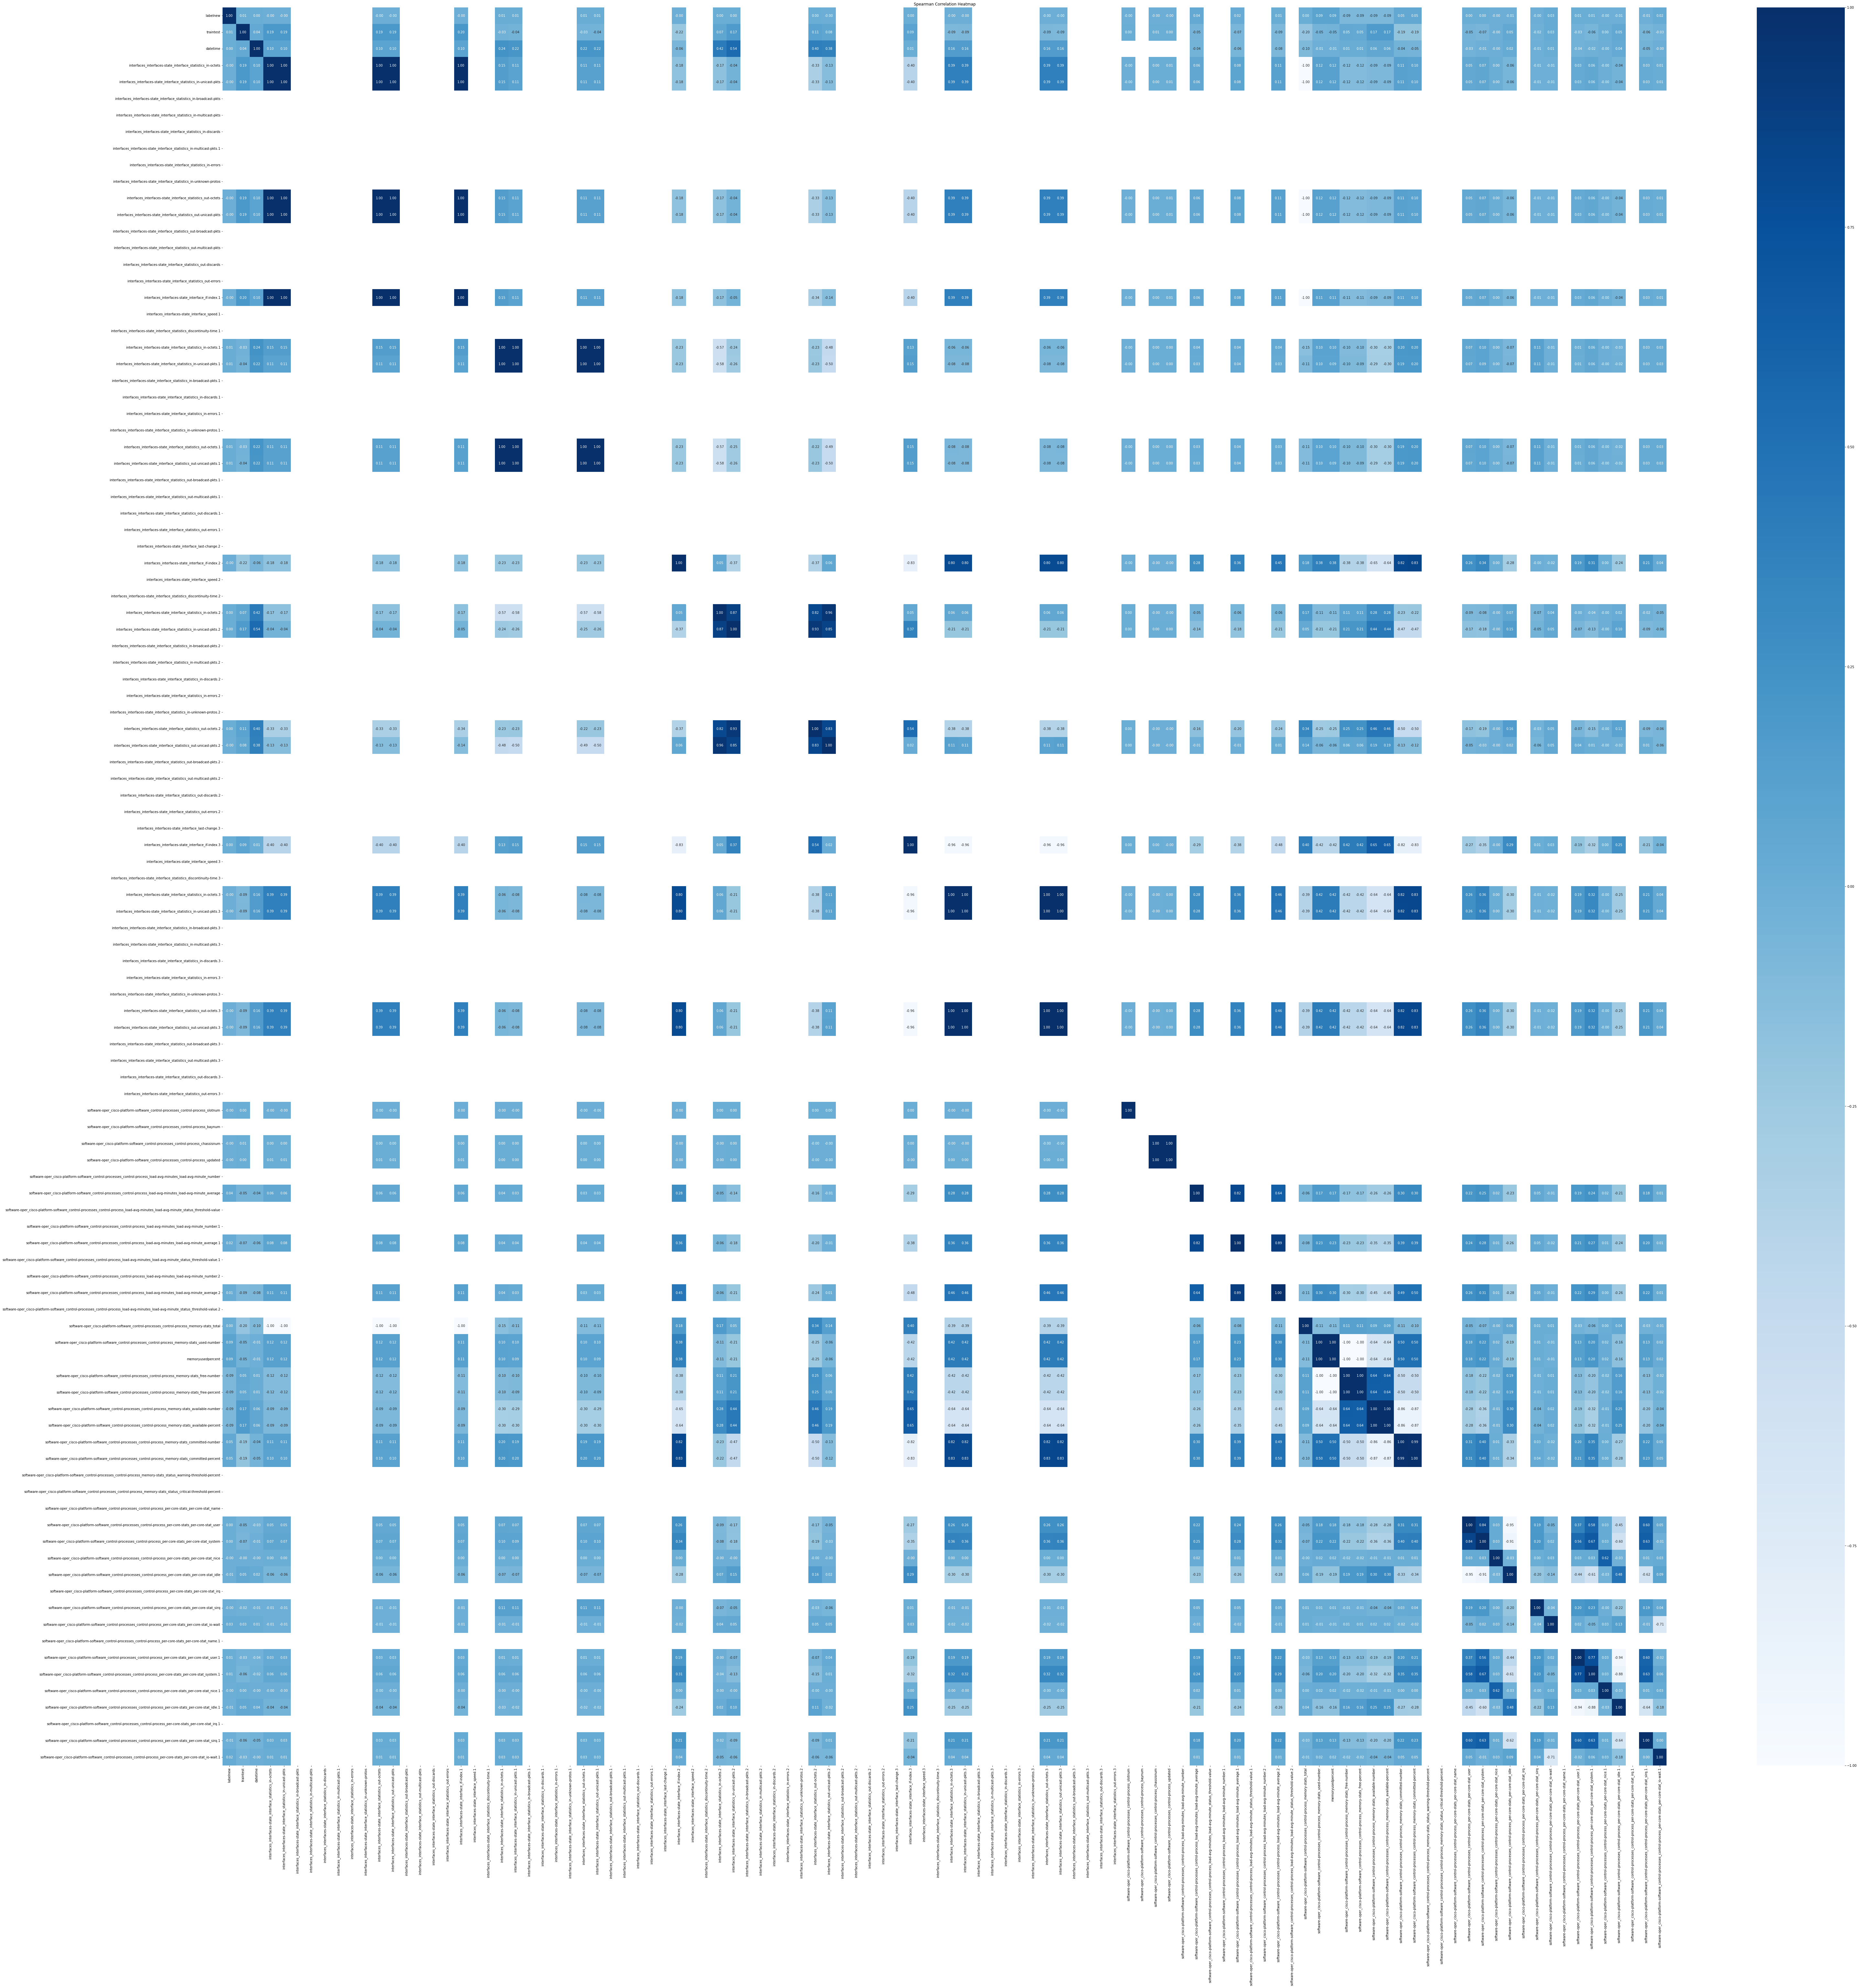

In [ ]:
corr = df.corr(method = 'spearman')
plt.figure(figsize=(100,100))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Spearman Correlation Heatmap')
plt.show()

In [ ]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percentage of missing data
percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing data: \n",percent_missing)

Percentage of missing data: 
 6.100815395733948


In [ ]:
df = df.dropna(subset=['datetime'])

In [ ]:
df['datetime'].isnull().sum()

0

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y%m%d%H%M%S')
df['datetime']

0        2021-01-28 17:44:40
1        2021-01-28 17:44:50
2        2021-01-28 17:45:00
3        2021-01-28 17:45:10
4        2021-01-28 17:45:20
                 ...        
849989   2021-02-10 13:37:00
849990   2021-02-10 13:37:10
849991   2021-02-10 13:37:20
849992   2021-02-10 13:37:30
849993   2021-02-10 13:37:40
Name: datetime, Length: 849939, dtype: datetime64[ns]

In [ ]:
#get the null values in each column
for column in df:
  print(df[column])
  print( df[column].isnull().sum())
  print('\n \n')

0         0
1         0
2         0
3         0
4         0
         ..
849989    0
849990    0
849991    0
849992    0
849993    0
Name: labelnew, Length: 849939, dtype: int64
0

 

0         a
1         a
2         a
3         a
4         a
         ..
849989    c
849990    c
849991    c
849992    c
849993    c
Name: abc, Length: 849939, dtype: object
0

 

0         0
1         0
2         0
3         0
4         0
         ..
849989    1
849990    1
849991    1
849992    1
849993    1
Name: traintest, Length: 849939, dtype: int64
0

 

0        2021-01-28 17:44:40
1        2021-01-28 17:44:50
2        2021-01-28 17:45:00
3        2021-01-28 17:45:10
4        2021-01-28 17:45:20
                 ...        
849989   2021-02-10 13:37:00
849990   2021-02-10 13:37:10
849991   2021-02-10 13:37:20
849992   2021-02-10 13:37:30
849993   2021-02-10 13:37:40
Name: datetime, Length: 849939, dtype: datetime64[ns]
0

 

0         amfa1
1         amfa1
2         amfa1
3         amfa1
4         a

In [ ]:
df.isna().sum()

labelnew                                                                                                            0
abc                                                                                                                 0
traintest                                                                                                           0
datetime                                                                                                            0
node                                                                                                                0
                                                                                                                 ... 
software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_nice.1       624
software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle.1       624
software-oper_cisco-platform-software_control-processes_

In [ ]:
df = df.drop(['interfaces_interfaces-state_interface_statistics_discontinuity-time.3','interfaces_interfaces-state_interface_speed.3','interfaces_interfaces-state_interface_last-change.3','interfaces_interfaces-state_interface_statistics_discontinuity-time.2','interfaces_interfaces-state_interface_last-change.2','interfaces_interfaces-state_interface_statistics_discontinuity-time.1','interfaces_interfaces-state_interface_speed.1'], axis = 1)

In [ ]:
df = df.fillna(999)

In [ ]:
df.duplicated().sum()

98533

In [ ]:
for column in df:
  print(df[column].unique())
  print('\n \n') 

[0 1]

 

['a' 'b' 'c']

 

[0 1]

 

['2021-01-28T17:44:40.000000000' '2021-01-28T17:44:50.000000000'
 '2021-01-28T17:45:00.000000000' ... '2021-02-09T15:35:10.000000000'
 '2021-02-09T15:36:00.000000000' '2021-02-09T15:36:10.000000000']

 

['amfa1' 'udma1' 'ausfa1' 'amfb1' 'ausfb1' 'udmb1' 'amfc1' 'ausfc1'
 'udmc1']

 

[0.000000e+00 9.990000e+02 5.276190e+06 5.276346e+06 5.281119e+06
 5.281695e+06 5.282847e+06 5.283423e+06 5.283999e+06 5.284207e+06
 5.284415e+06 5.289189e+06 5.290341e+06 5.290917e+06 5.291125e+06
 5.296107e+06 5.296263e+06 5.301037e+06 5.301424e+06 5.302198e+06
 5.302585e+06 5.303359e+06 5.303746e+06 5.304133e+06 5.304341e+06
 5.304917e+06 5.305493e+06 5.306069e+06 5.306277e+06 5.311154e+06
 5.311541e+06 5.311749e+06 5.312901e+06 5.313477e+06 5.314629e+06
 5.315205e+06 5.316357e+06 5.316933e+06 5.318085e+06 5.318293e+06
 5.323066e+06 5.323454e+06 5.324030e+06 5.324419e+06 5.324808e+06
 5.325586e+06 5.325975e+06 5.326753e+06 5.326961e+06 5.328113e+06
 5.329265e+06 5.

In [ ]:
df.isnull().sum()

labelnew                                                                                                          0
abc                                                                                                               0
traintest                                                                                                         0
datetime                                                                                                          0
node                                                                                                              0
                                                                                                                 ..
software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_nice.1       0
software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle.1       0
software-oper_cisco-platform-software_control-processes_control-process_

In [ ]:
df

,labelnew,abc,traintest,datetime,node,interfaces_interfaces-state_interface_statistics_in-octets,interfaces_interfaces-state_interface_statistics_in-unicast-pkts,interfaces_interfaces-state_interface_statistics_in-broadcast-pkts,interfaces_interfaces-state_interface_statistics_in-multicast-pkts,interfaces_interfaces-state_interface_statistics_in-discards,...,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_name.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_user.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_nice.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_irq.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait.1
0,0,a,0,2021-01-28 17:44:40,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,1.0,0.20,0.20,0.0,99.19,0.0,0.0,0.40
1,0,a,0,2021-01-28 17:44:50,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.09,1.0,0.73,0.36,0.0,98.63,0.0,0.0,0.27
2,0,a,0,2021-01-28 17:45:00,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.22,1.0,1.11,0.44,0.0,98.22,0.0,0.0,0.22
3,0,a,0,2021-01-28 17:45:10,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,1.0,0.60,0.30,0.0,99.00,0.0,0.1,0.00
4,0,a,0,2021-01-28 17:45:20,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.37,1.0,1.10,0.37,0.0,98.53,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849989,0,c,1,2021-02-10 13:37:00,udmc1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.30,1.0,1.20,0.30,0.0,98.49,0.0,0.0,0.00
849990,0,c,1,2021-02-10 13:37:10,udmc1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,1.0,1.60,1.10,0.0,96.90,0.0,0.2,0.20
849991,0,c,1,2021-02-10 13:37:20,udmc1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,1.0,1.40,0.20,0.0,98.00,0.0,0.0,0.40
849992,0,c,1,2021-02-10 13:37:30,udmc1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,1.0,0.69,0.20,0.0,98.91,0.0,0.0,0.20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 <a list of 98 Text major ticklabel objects>)

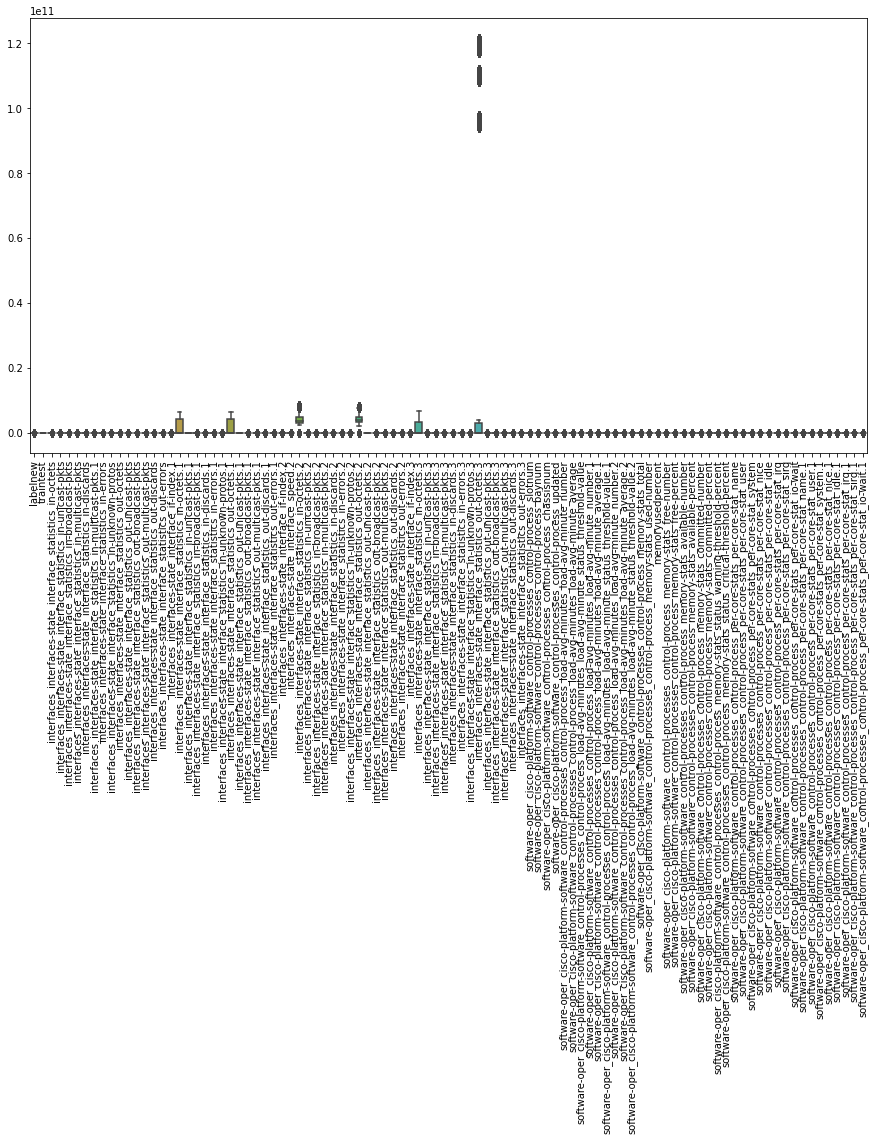

In [ ]:
plt.figure(figsize =[15,8])
sns.boxplot(data=df)
plt.xticks(rotation = 90)

## **Split the dataset into train and test sets**

In [ ]:
train = df[(df['traintest']==0) & (df['abc']=='c')]  #a,c
test = df[(df['traintest']==1) & (df['abc']=='a')] #a,c
date_1 = train['datetime'] 
date_2 = test['datetime']
y_train = train['labelnew'].values  

train = train.drop(['labelnew','abc','traintest','datetime','node'],axis=1)

print('train:',train.shape)
X_train =  train.values  
y_test = test['labelnew'].values

test = test.drop(['labelnew','abc','traintest','datetime','node'],axis=1)
X_test =  test.values  

print('X_train', X_train.shape)
print('X_test', X_test.shape)

train: (295599, 96)
X_train (295599, 96)
X_test (73886, 96)


In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score

 ## **XGBOOST classification Model** 

In [ ]:
start_time = time.time()

clf = XGBClassifier(
    silent=0,  # 
    nthread = -1, # 
    tree_method= 'exact', 
    booster='gbtree',
    n_estimators=80,  # 
    max_depth=4, #
    learning_rate=0.2, 
    max_delta_step=1, 
    subsample=0.85, 
    colsample_bytree=0.8, 
    objective ='binary:logistic',
    )
import joblib
print('make model')
clf.fit(X_train, y_train)
print('save model')
joblib.dump(clf, 'Xgboost.pkl')

print("Xgboost training cost time : ",time.time()-start_time)

make model
save model
Xgboost training cost time :  43.57538938522339


### **Train results of the XGBOOST** 

In [ ]:
rfcbuild = joblib.load('Xgboost.pkl')
TrainResult = rfcbuild.predict(X_train)

colNum = TrainResult.shape[0]
TrainResult = TrainResult.reshape(colNum,1)

In [ ]:
print("confusion_matrix:")
print(confusion_matrix(y_train,TrainResult))

confusion_matrix:
[[292395      0]
 [     0   3204]]


In [ ]:
print(classification_report(y_train,TrainResult))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    292395
           1       1.00      1.00      1.00      3204

    accuracy                           1.00    295599
   macro avg       1.00      1.00      1.00    295599
weighted avg       1.00      1.00      1.00    295599



In [ ]:
roc_auc1 = roc_auc_score(y_train,TrainResult)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 1.000000


### **Testing results of XGBOOST**

In [ ]:
TestResult = rfcbuild.predict(X_test)
colNum = TestResult.shape[0]
TestResult = TestResult.reshape(colNum,1)

In [ ]:
print("confusion_matrix:")
print(confusion_matrix(y_test,TestResult))

confusion_matrix:
[[72534     0]
 [    0  1352]]


In [ ]:
print(classification_report(y_test,TestResult))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72534
           1       1.00      1.00      1.00      1352

    accuracy                           1.00     73886
   macro avg       1.00      1.00      1.00     73886
weighted avg       1.00      1.00      1.00     73886



In [ ]:
roc_auc1 = roc_auc_score(y_test,TestResult)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 1.000000


## **Feature selection Based on XGBOOST Model**

In [ ]:
# Feature Importance
plt.figure(figsize=(10, 5))
fea = rfcbuild.feature_importances_
maxrange=np.max(fea)-np.min(fea)

fea_normed = 100 * fea/np.max(fea)

np.set_printoptions(suppress=True)
print('Importance score: ')
print(np.round(fea_normed,2))

Importance score: 
[ 25.02  73.43   0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.17   0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.06 100.     0.12
   0.39   0.     0.     0.     0.     0.     0.09   0.     0.     0.
   0.     0.     0.     0.01   0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.08   0.     0.     0.18   0.     0.     0.     0.     0.
  93.12   0.     0.22  97.24   0.17   0.     0.2    0.     0.     0.
   0.     0.68   0.11   0.     0.04   0.     0.     0.     0.     0.23
   0.     0.     0.03   0.     0.     0.22]


<Figure size 720x360 with 0 Axes>

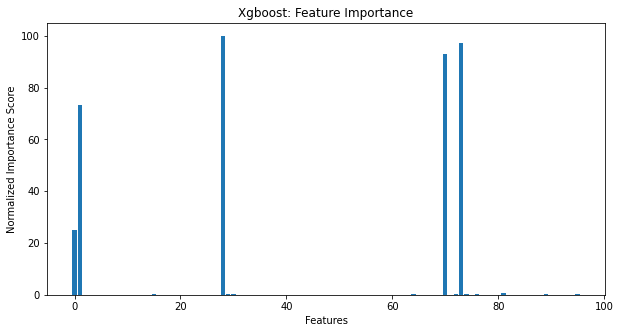

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(rfcbuild.feature_importances_)), fea_normed)
plt.title("Xgboost: Feature Importance")
plt.xlabel("Features")
plt.ylabel("Normalized Importance Score")
plt.show()

In [ ]:
print(clf.feature_importances_)

[0.06385928 0.18741722 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00042135 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00014039 0.25523883 0.00030739
 0.00100804 0.         0.         0.         0.         0.
 0.00021703 0.         0.         0.         0.         0.
 0.         0.00002182 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00020397 0.         0.         0.00044676 0.
 0.         0.         0.         0.         0.2376784  0.
 0.00054917 0.24820267 0.00042831 0.         0.0005044  0.
 0.         0.         0.         0.0017472  0.00028269 0.
 0.00010181 0.         0.         0.         0.         0.00058395
 0.         0.         0.00006693 0.         0.         0.0005724 ]


<Figure size 1440x1800 with 0 Axes>

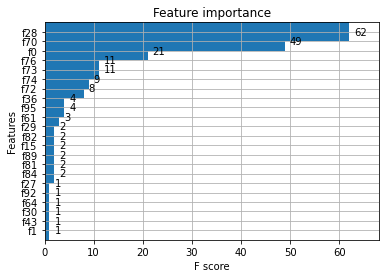

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
pyplot.figure(figsize=(20, 25))
# plot feature importance
plot_importance(clf, height=2)
pyplot.show()

In [ ]:
importance = clf.feature_importances_


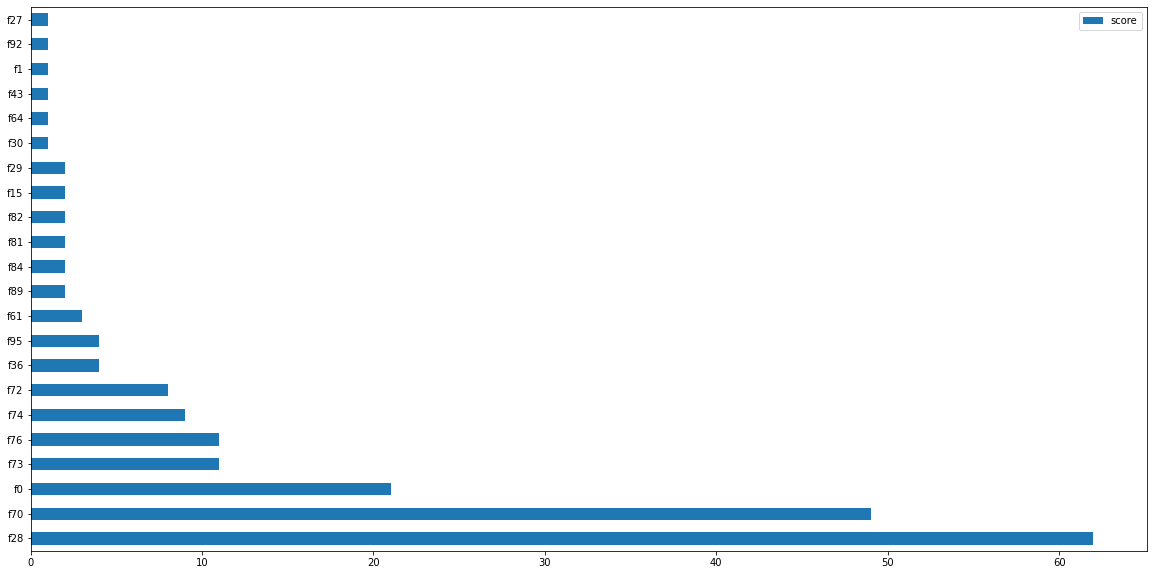

In [ ]:
feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [ ]:
x_train = pd.DataFrame(X_train,columns = train.columns)

In [ ]:
x_test = pd.DataFrame(X_test,columns = test.columns)

In [ ]:
importance = fea_normed.tolist()

In [ ]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 25.01942
Feature: 1, Score: 73.42818
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.16508
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.05500
Feature: 28, Score: 100.00000
Feature: 29, Score: 0.12043
Feature: 30, Score: 0.39494
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.0000

In [ ]:
index = [i for i, e in enumerate(importance) if e >0]
index

[0,
 1,
 15,
 27,
 28,
 29,
 30,
 36,
 43,
 61,
 64,
 70,
 72,
 73,
 74,
 76,
 81,
 82,
 84,
 89,
 92,
 95]

In [ ]:
# Get the list of all column names from headers
column_headers = df.columns[95]
print("The Column Header :", column_headers)

The Column Header : software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system.1


## **New data based on feature selection**

In [ ]:
new_df = df[['labelnew',
             'abc',
             'interfaces_interfaces-state_interface_statistics_out-broadcast-pkts',
             'interfaces_interfaces-state_interface_statistics_out-unicast-pkts.1',
             'interfaces_interfaces-state_interface_statistics_out-broadcast-pkts.1',
             'interfaces_interfaces-state_interface_statistics_out-multicast-pkts.1',
             'interfaces_interfaces-state_interface_statistics_out-discards.1',
             'interfaces_interfaces-state_interface_statistics_in-broadcast-pkts.2',
             'interfaces_interfaces-state_interface_statistics_out-broadcast-pkts.2',
             'software-oper_cisco-platform-software_control-processes_control-process_slotnum',
             'software-oper_cisco-platform-software_control-processes_control-process_updated',
             'software-oper_cisco-platform-software_control-processes_control-process_load-avg-minutes_load-avg-minute_status_threshold-value.1',
             'software-oper_cisco-platform-software_control-processes_control-process_load-avg-minutes_load-avg-minute_average.2',
             'software-oper_cisco-platform-software_control-processes_control-process_load-avg-minutes_load-avg-minute_status_threshold-value.2',
             'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_total',
             'memoryusedpercent',
             'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_committed-number',
             'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_committed-percent',
             'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_status_critical-threshold-percent',
             'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle',
             'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait',
             'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system.1'




            #         'interfaces_interfaces-state_interface_statistics_out-broadcast-pkts.1',
            #         'interfaces_interfaces-state_interface_statistics_out-multicast-pkts.1',
            #         'interfaces_interfaces-state_interface_statistics_out-errors.1',
            #         'interfaces_interfaces-state_interface_last-change.2',
            #  'interfaces_interfaces-state_interface_statistics_in-multicast-pkts.2',
            #         'interfaces_interfaces-state_interface_statistics_in-broadcast-pkts.2',
            #         'interfaces_interfaces-state_interface_statistics_out-errors.2',
            #         'software-oper_cisco-platform-software_control-processes_control-process_slotnum',
            #         'software-oper_cisco-platform-software_control-processes_control-process_load-avg-minutes_load-avg-minute_status_threshold-value',
            #         'software-oper_cisco-platform-software_control-processes_control-process_load-avg-minutes_load-avg-minute_status_threshold-value.1',
            #         'software-oper_cisco-platform-software_control-processes_control-process_load-avg-minutes_load-avg-minute_average.2',
            #         'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_total',
            #         'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_used-number',
            #         'memoryusedpercent',
            #         'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_committed-number',
            #         'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_committed-percent',
            #         'software-oper_cisco-platform-software_control-processes_control-process_memory-stats_status_critical-threshold-percent',
            #         'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system',
            #         'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle',
            #         'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_irq',
            #         'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait',
            #         'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_user.1',
            #         'software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system.1'
                                        ]]

In [ ]:
new_df

,labelnew,abc,interfaces_interfaces-state_interface_statistics_out-broadcast-pkts,interfaces_interfaces-state_interface_statistics_out-unicast-pkts.1,interfaces_interfaces-state_interface_statistics_out-broadcast-pkts.1,interfaces_interfaces-state_interface_statistics_out-multicast-pkts.1,interfaces_interfaces-state_interface_statistics_out-discards.1,interfaces_interfaces-state_interface_statistics_in-broadcast-pkts.2,interfaces_interfaces-state_interface_statistics_out-broadcast-pkts.2,software-oper_cisco-platform-software_control-processes_control-process_slotnum,...,software-oper_cisco-platform-software_control-processes_control-process_load-avg-minutes_load-avg-minute_average.2,software-oper_cisco-platform-software_control-processes_control-process_load-avg-minutes_load-avg-minute_status_threshold-value.2,software-oper_cisco-platform-software_control-processes_control-process_memory-stats_total,memoryusedpercent,software-oper_cisco-platform-software_control-processes_control-process_memory-stats_committed-number,software-oper_cisco-platform-software_control-processes_control-process_memory-stats_committed-percent,software-oper_cisco-platform-software_control-processes_control-process_memory-stats_status_critical-threshold-percent,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system.1
0,0,a,0.0,108475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03,10.0,2047852.0,60.0,4743400.0,232.0,93.0,98.59,0.00,0.20
1,0,a,0.0,108475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03,10.0,2047852.0,60.0,4778768.0,233.0,93.0,99.27,0.09,0.36
2,0,a,0.0,108475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03,10.0,2047852.0,60.0,4802356.0,235.0,93.0,99.33,0.22,0.44
3,0,a,0.0,108475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,10.0,2047852.0,60.0,4829088.0,236.0,93.0,99.20,0.10,0.30
4,0,a,0.0,108475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,10.0,2047852.0,60.0,4860032.0,237.0,93.0,99.18,0.37,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849989,0,c,0.0,32115101.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,10.0,2047852.0,42.0,1054520.0,51.0,93.0,99.50,0.30,0.30
849990,0,c,0.0,32115345.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,10.0,2047852.0,42.0,1057556.0,52.0,93.0,97.60,0.00,1.10
849991,0,c,0.0,32115345.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,10.0,2047852.0,42.0,1057168.0,52.0,93.0,100.00,0.00,0.20
849992,0,c,0.0,32115345.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,10.0,2047852.0,42.0,1052576.0,51.0,93.0,99.41,0.00,0.20


## **Split the new_df and apply Random Forest Classifier**

In [ ]:
new_train = new_df[ (new_df['abc']=='c')]  #a,c
new_test = new_df[ (new_df['abc']=='a')] #a,c

new_y_train = new_train['labelnew'].values  
new_train = new_train.drop(['labelnew','abc'
                    ],axis=1)

print('train:',new_train.shape)
new_X_train =  new_train.values  

new_y_test = new_test['labelnew'].values
new_test = new_test.drop(['labelnew','abc'
                    ],axis=1)
new_X_test =  new_test.values  

print('X_train', new_X_train.shape)
print('X_test', new_X_test.shape)

train: (369488, 20)
X_train (369488, 20)
X_test (369485, 20)


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rf=RandomForestClassifier()
rf.fit(new_X_train,new_y_train)
y_pred=rf.predict(new_X_test)

### **Train and test resluts of Random Forest model**

In [ ]:
print(classification_report(rf.predict(new_X_train),new_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    365479
           1       1.00      1.00      1.00      4009

    accuracy                           1.00    369488
   macro avg       1.00      1.00      1.00    369488
weighted avg       1.00      1.00      1.00    369488



In [ ]:
print(classification_report(y_pred,new_y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    367041
           1       0.44      0.84      0.58      2444

    accuracy                           0.99    369485
   macro avg       0.72      0.92      0.79    369485
weighted avg       1.00      0.99      0.99    369485



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



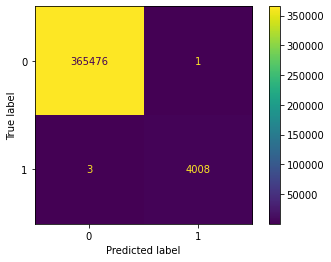

In [ ]:
plot_confusion_matrix(rf,new_X_train,new_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



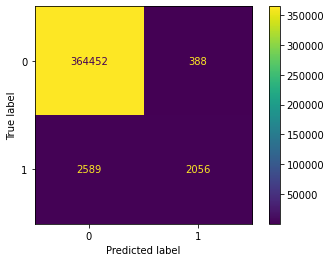

In [ ]:
plot_confusion_matrix(rf,new_X_test,new_y_test)

## **Apply XGBOOST model**

In [ ]:
xgb = XGBClassifier(
    silent=0,  # 
    nthread = -1, # 
    tree_method= 'exact', 
    booster='gbtree',
    n_estimators=80,  # 
    max_depth=4, #
    learning_rate=0.2, 
    max_delta_step=1, 
    subsample=0.85, 
    colsample_bytree=0.8, 
    objective ='binary:logistic',
    )
xgb.fit(new_X_train, new_y_train)

XGBClassifier(colsample_bytree=0.8, learning_rate=0.2, max_delta_step=1,
              max_depth=4, n_estimators=80, nthread=-1, silent=0,
              subsample=0.85, tree_method='exact')

In [ ]:
y_pred_xgb=xgb.predict(new_X_test)

### **Train and test resluts of XGBOOST model**

In [ ]:
print(classification_report(xgb.predict(new_X_train),new_y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    367494
           1       0.50      1.00      0.66      1994

    accuracy                           0.99    369488
   macro avg       0.75      1.00      0.83    369488
weighted avg       1.00      0.99      1.00    369488



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



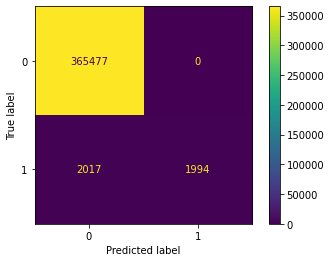

In [ ]:
plot_confusion_matrix(xgb,new_X_train,new_y_train)

In [ ]:
print(classification_report(y_pred_xgb,new_y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    367427
           1       0.44      1.00      0.61      2058

    accuracy                           0.99    369485
   macro avg       0.72      1.00      0.80    369485
weighted avg       1.00      0.99      0.99    369485



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



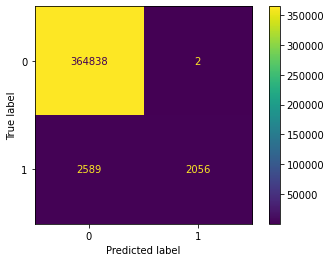

In [ ]:
plot_confusion_matrix(xgb,new_X_test,new_y_test)

## **Apply Filter Method using anova**

In [ ]:
def feature_selection(X_train, Y_train, X_test, Y_test,model, n_features, anova):
  from sklearn.feature_selection import f_classif
  from sklearn.feature_selection import mutual_info_classif
  from sklearn.feature_selection import SelectKBest
  import matplotlib.pyplot as plt
  from sklearn.metrics import accuracy_score
  acc = []
  feat = []
  for i in range(1, n_features):
    if anova:
      selecter = SelectKBest(f_classif, k = i)
    else:
      selecter = SelectKBest(mutual_info_classif, k=i)
    X_new = selecter.fit_transform(X_train, Y_train)
    X_test_new = selecter.transform(X_test)
    model.fit(X_new, Y_train)
    y_pred = model.predict(X_test_new)
    acc.append(accuracy_score(Y_test, y_pred))
    feat.append(i)
    print("feature " + str(i) + " finished")
  return acc, feat
  

In [ ]:
acc, feat = feature_selection(X_train, y_train, X_test, y_test, clf, 96, True)

feature 1 finished
feature 2 finished
feature 3 finished
feature 4 finished
feature 5 finished
feature 6 finished
feature 7 finished
feature 8 finished
feature 9 finished
feature 10 finished
feature 11 finished
feature 12 finished
feature 13 finished
feature 14 finished
feature 15 finished
feature 16 finished
feature 17 finished
feature 18 finished
feature 19 finished
feature 20 finished
feature 21 finished
feature 22 finished
feature 23 finished
feature 24 finished
feature 25 finished
feature 26 finished
feature 27 finished
feature 28 finished
feature 29 finished
feature 30 finished
feature 31 finished
feature 32 finished
feature 33 finished
feature 34 finished
feature 35 finished
feature 36 finished
feature 37 finished
feature 38 finished
feature 39 finished
feature 40 finished
feature 41 finished
feature 42 finished
feature 43 finished
feature 44 finished
feature 45 finished
feature 46 finished
feature 47 finished
feature 48 finished
feature 49 finished
feature 50 finished
feature 5

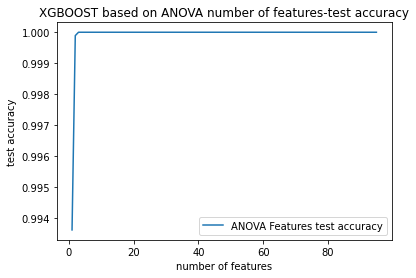

In [ ]:
plt.plot(feat, acc, label = "ANOVA Features test accuracy")
plt.title("XGBOOST based on ANOVA number of features-test accuracy")
plt.xlabel("number of features")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
max(acc)

1.0

In [ ]:
feat[np.argmax(np.array(acc))]

3